In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
import os

path ="/content/drive/MyDrive/braille/train/"
files = os.listdir(path)[:11]
print(files)

classes={'a':0, 'b':1, 'c':2, 'd':3, 'e':4, 'f':5, 'g':6, 'h':7, 'i':8, 'j':9, 'k':10}

['c', 'b', 'a', 'd', 'k', 'e', 'f', 'g', 'h', 'i', 'j']


In [27]:
import cv2
x=[]
y=[]

for cl in classes:
  pth = path+cl
  for img_name in os.listdir(pth):
    img = cv2.imread(pth+"/"+img_name,0)
    img = cv2.resize(img, (64, 64))
    x.append(img)
    y.append(classes[cl])

print("Successful")

Successful


In [28]:
pd.Series(y).value_counts()

9     30
0     29
2     26
10    26
7     25
8     25
4     23
1     22
6     21
3     19
5     16
dtype: int64

In [29]:
x[0].shape

(64, 64)

In [30]:
x=np.array(x)
y=np.array(y)
#print(type(x))

In [31]:
#plt.imshow(x[41],cmap="gray")
#print(y[0])

In [32]:
x.shape

(262, 64, 64)

In [33]:
x_new = x.reshape(len(x),-1)
#print(x_new.shape)
#print(y.shape)

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y, test_size=0.20, random_state=10)

In [35]:
print(type(xtrain))

<class 'numpy.ndarray'>


In [36]:
x_train = xtrain/255
x_test = xtest/255

In [37]:
from sklearn.decomposition import PCA

In [38]:
#print(x_train.shape, x_test.shape)
pca = PCA(.98)
xtrain = pca.fit_transform(x_train)
xtest = pca.transform(x_test)



In [39]:
log = LogisticRegression()
log.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
tr_pred = log.predict(xtrain)
ts_pred = log.predict(xtest)
decode = {0:'A', 1:'B',2:'C'}

In [41]:
import pickle

In [42]:
#pickle.dump(log,open('model.pkl','wb'))

In [43]:
print(accuracy_score(ytrain,tr_pred))
print(accuracy_score(ytest,ts_pred))

1.0
0.9245283018867925


9


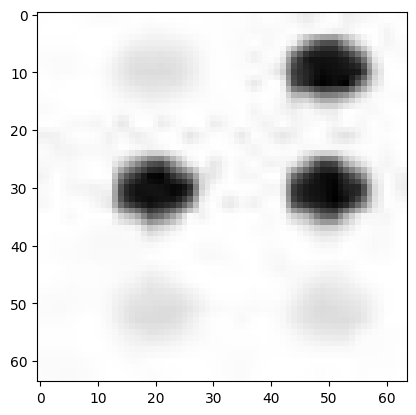

In [44]:
plt.imshow(x_test[5].reshape(64,64), cmap = 'gray')
print(ytest[5])

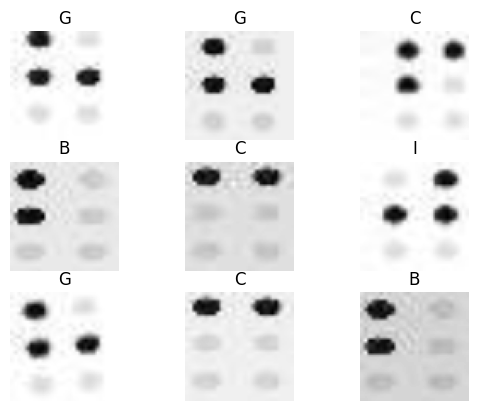

In [45]:
decode = {0:'A', 1:'B',2:'C',3:'D', 4:'E', 5:'E', 6:'F',7:'G', 8:'H', 9:'I', 10:'J', 11:'K'}
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i].reshape(64,64),cmap='gray')
  plt.title(decode[ts_pred[i]])
  plt.axis('off')

In [ ]:
import joblib
joblib.dump(log, 'braille_classifier.pkl')


['braille_classifier.pkl']

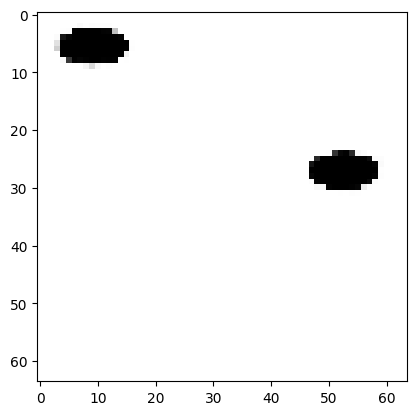

In [58]:
img = cv2.resize(cv2.imread('/content/E3 - Copy - Copy.jpeg',0),(64,64)) # put the image path here
plt.imshow(img,cmap='gray')

In [59]:
img = pca.transform(img.reshape(1,-1)/255)

In [60]:
decode[log.predict(img)[0]]

'A'

In [ ]:
def call(s):
  img = cv2.resize(cv2.imread(s,0),(64,64)) 
  plt.imshow(img,cmap='gray')
  img = pca.transform(img.reshape(1,-1)/255)
  return decode[log.predict(img)[0]]

C


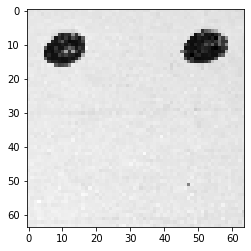

In [ ]:
a = call("") #put the image path here
print(a)

In [ ]:
print(a)

C
